<a href="https://colab.research.google.com/github/medayoubaziz/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
name_file = '/content/sales_predictions_2023.csv'
df = pd.read_csv(name_file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df['Outlet_Size'].duplicated().value_counts(normalize = True)

True     0.999531
False    0.000469
Name: Outlet_Size, dtype: float64

In [8]:
#it's less than 2% so we should drop them
df.dropna(subset=['Outlet_Size'], inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_Weight'].duplicated().value_counts(normalize = True)

True     0.93293
False    0.06707
Name: Item_Weight, dtype: float64

In [10]:
df.groupby('Item_Fat_Content')['Item_Weight'].mean()

Item_Fat_Content
LF         12.868672
Low Fat    13.036929
Regular    12.687930
low fat    12.234245
reg        12.742817
Name: Item_Weight, dtype: float64

In [11]:
df.replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)

In [12]:
df.groupby('Item_Fat_Content')['Item_Weight'].mean()

Item_Fat_Content
Low Fat    13.012853
Regular    12.690298
Name: Item_Weight, dtype: float64

In [13]:
df['Item_Fat_Content'].value_counts()

Low Fat    3955
Regular    2158
Name: Item_Fat_Content, dtype: int64

In [14]:
low = df['Item_Fat_Content'] == 'Low Fat'
mean_low = df.loc[low,'Item_Weight'].mean(skipna=True)
df[low].isna().sum()

Item_Identifier                0
Item_Weight                  951
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [15]:
reg = df['Item_Fat_Content'] == 'Regular'
mean_reg = df.loc[reg, 'Item_Weight'].mean(skipna=True)
df[reg].isna().sum()

Item_Identifier                0
Item_Weight                  512
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [16]:
def fill_missing_reg() :
  for miss in df[reg>0] :
    df[miss].fillna(mean_reg, inplace=True)


In [17]:
def fill_missing_low() :
  for miss in df[low>0] :
    df[miss].fillna(mean_low, inplace=True)

In [18]:
fill_missing_reg()
fill_missing_low()

In [19]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB


In [21]:
num_columns = df.dtypes[df.dtypes != 'object']

In [22]:
num_columns.head()

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [23]:
num_columns.index

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
df[num_columns.index].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.848805,0.064505,141.256859,1995.794373,2322.688445
std,4.074731,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.690298,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


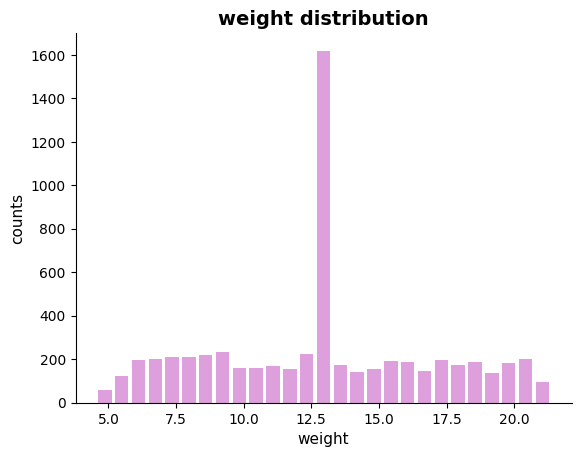

In [56]:
plt.hist(df['Item_Weight'] , rwidth = .8 , color = 'plum' , bins ='auto')
plt.xlabel('weight', fontsize = 11)
plt.ylabel('counts', fontsize = 11)
plt.title('weight distribution', fontsize = 14 , fontweight = 'bold')
sns.despine()
plt.show()

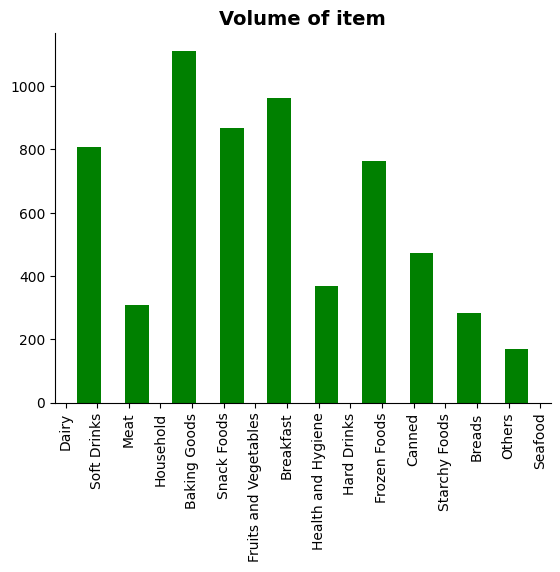

In [55]:
plt.hist(df['Item_Type'],rwidth = .5 , color = 'green')
plt.xticks(rotation=90)
plt.title('Volume of item' , fontsize = 14 , fontweight='bold')
sns.despine()
plt.show()

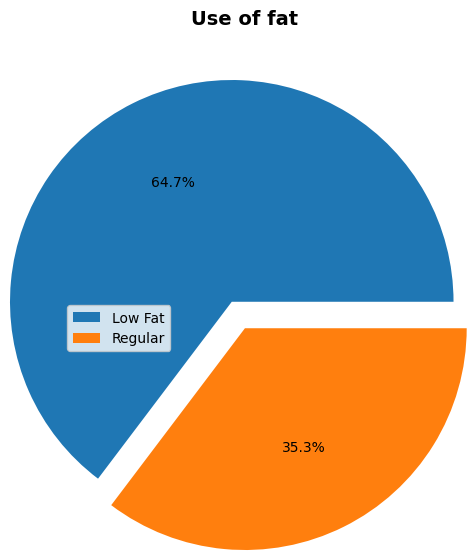

In [60]:
plt.pie(df['Item_Fat_Content'].value_counts(), autopct = '%0.1f%%' , radius = 1.5 , explode = [0.2,0])
plt.legend(['Low Fat' , 'Regular'])
plt.title('Use of fat', fontsize=14, fontweight='bold', loc="center" , y=1.3)
plt.show()

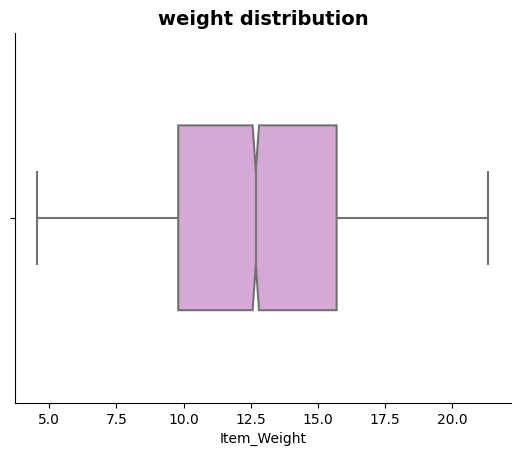

In [62]:
sns.boxplot(x='Item_Weight' , data = df , width= .5 , color = 'plum' , notch = True , orient = 'h')
sns.despine()
plt.title('weight distribution' , fontsize = 14 , fontweight = 'bold')
plt.show()

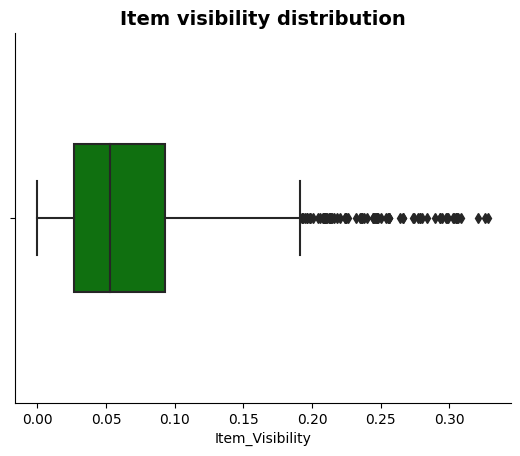

In [69]:
sns.boxplot(x='Item_Visibility' , data=df , width=.4 , color = 'green'  )
sns.despine()
plt.title('Item visibility distribution' , fontsize = 14 , fontweight = 'bold')
plt.show()

<ipython-input-74-99863b5b940a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


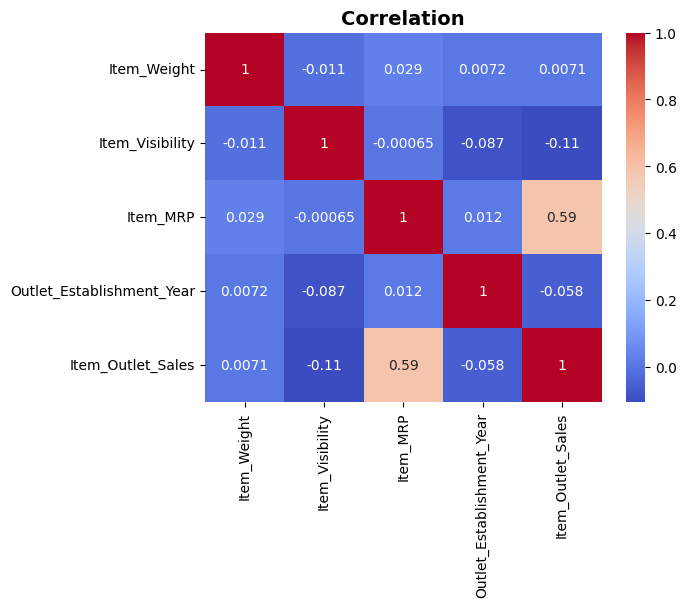

In [74]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm' ,annot = True )
plt.title('Correlation', fontsize = 14 , fontweight = 'bold')
plt.show()

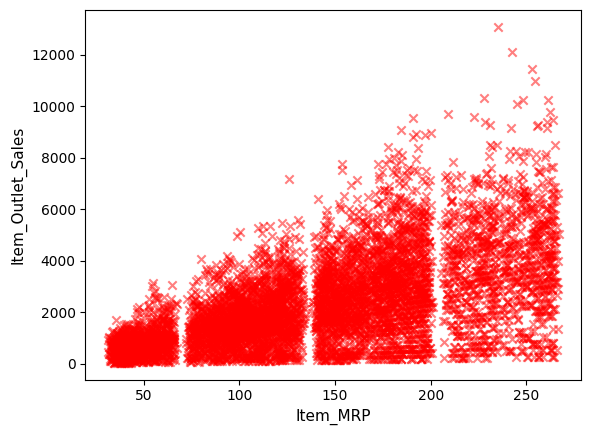

In [77]:
plt.scatter(x='Item_MRP', y='Item_Outlet_Sales', data = df, color='r',marker='x',alpha=.5 )
plt.xlabel('Item_MRP' , fontsize =11)
plt.ylabel('Item_Outlet_Sales', fontsize=11)
plt.show()